In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import font_manager
import warnings
warnings.filterwarnings(action='ignore')


%matplotlib inline
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()
plt.rcParams['font.family'] = 'AppleGothic'

In [ ]:
def gu_filtering(df,station):
    
    # 컬럼명 편집
    df.columns=['자전거번호', '대여일시', 'id', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리']
    T_station = station[['대여소\n번호','소재지(위치)','Unnamed: 4','Unnamed: 5']]
    T_station.columns=['id','소재지(위치)','Unnamed: 4','Unnamed: 5']
    
    # 합집합 merge
    T_station = pd.merge(sb2101,T_station,how='outer',on='id')
    q = T_station['소재지(위치)'].astype(str)
    T_station['소재지(위치)'] = q
    
    #groupby 를 통한 구별 이용량 통계
    total = T_station.groupby(T_station['소재지(위치)']).count()[['자전거번호']]
    total = total.reset_index()
    
    #불필요 데이터 삭제
    total = total.drop(index=[0,23], axis=0)
    
    # 정렬
    total = total.sort_values(by='자전거번호',ascending=False)
    
    plt.figure(figsize=(20, 10))
    plt.title(df['대여일시'][0].split(' ')[0].split('-')[:2],size=30)
    return plt.plot(total['소재지(위치)'],total['자전거번호'])

In [ ]:
'''
서울시 전체의 따릉이 이용량을 구 별로 색의 농도로 나타내고 
높은곳은 따릉이 정류소에 대여와 반납이 편중된곳이 있는지 찾아보기
그리고 가장 반납률이 많거나 대여량이 많은 정류소들을 다시 색 농도로 나타내기

낮은곳은 그 이유를 찾아보고 이유에 대한 다른 데이터를 추가적으로 접목시키기
예) 인구의 평균 연령이높다
'''

In [ ]:
'''
전체 데이터를 이용 데이터를 모아서
구별 따릉이 사용량 지도 시각화

'''

In [32]:
sb2101 = pd.read_csv('./data/seoul_bike_2021.01.csv',encoding='cp949')

In [84]:
sb2101['대여일시'][0].split(' ')[0].split('-')[1]

'01'

In [33]:
station = pd.read_csv('./data/location_2021.01.csv',encoding='cp949')

In [91]:
def gu_filtering(df,station):
    
    # 컬럼명 편집
    df.columns=['자전거번호', '대여일시', 'id', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리']
    T_station = station[['대여소\n번호','소재지(위치)','Unnamed: 4','Unnamed: 5']]
    T_station.columns=['id','소재지(위치)','Unnamed: 4','Unnamed: 5']
    
    # 합집합 merge
    T_station = pd.merge(sb2101,T_station,how='outer',on='id')
    q = T_station['소재지(위치)'].astype(str)
    T_station['소재지(위치)'] = q
    
    #groupby 를 통한 구별 이용량 통계
    total = T_station.groupby(T_station['소재지(위치)']).count()[['자전거번호']]
    total = total.reset_index()
    
    #불필요 데이터 삭제
    total = total.drop(index=[0,23], axis=0)
    
    # 정렬
    total = total.sort_values(by='자전거번호',ascending=False)
    
    plt.figure(figsize=(20, 10))
    plt.title(df['대여일시'][0].split(' ')[0].split('-')[:2],size=30)
    return plt.plot(total['소재지(위치)'],total['자전거번호'])

In [34]:
sb2101.columns=['자전거번호', '대여일시', 'id', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리']

In [35]:
T_station = station[['대여소\n번호','소재지(위치)','Unnamed: 4','Unnamed: 5']]
T_station.columns=['id','소재지(위치)','Unnamed: 4','Unnamed: 5']

In [36]:
T_station = pd.merge(sb2101,T_station,how='outer',on='id')

In [37]:
q = T_station['소재지(위치)'].astype(str)
T_station['소재지(위치)'] = q

In [49]:
total = T_station.groupby(T_station['소재지(위치)']).count()[['자전거번호']]

In [57]:
total = total.reset_index()
total

,소재지(위치),자전거번호
0,nan,2881
1,강남구,24434
2,강동구,25846
3,강북구,16017
4,강서구,74453
5,관악구,27248
6,광진구,37783
7,구로구,31448
8,금천구,13414
9,노원구,41774


In [59]:
total = total.drop(index=[0,23], axis=0)

In [70]:
total = total.sort_values(by='자전거번호',ascending=False)

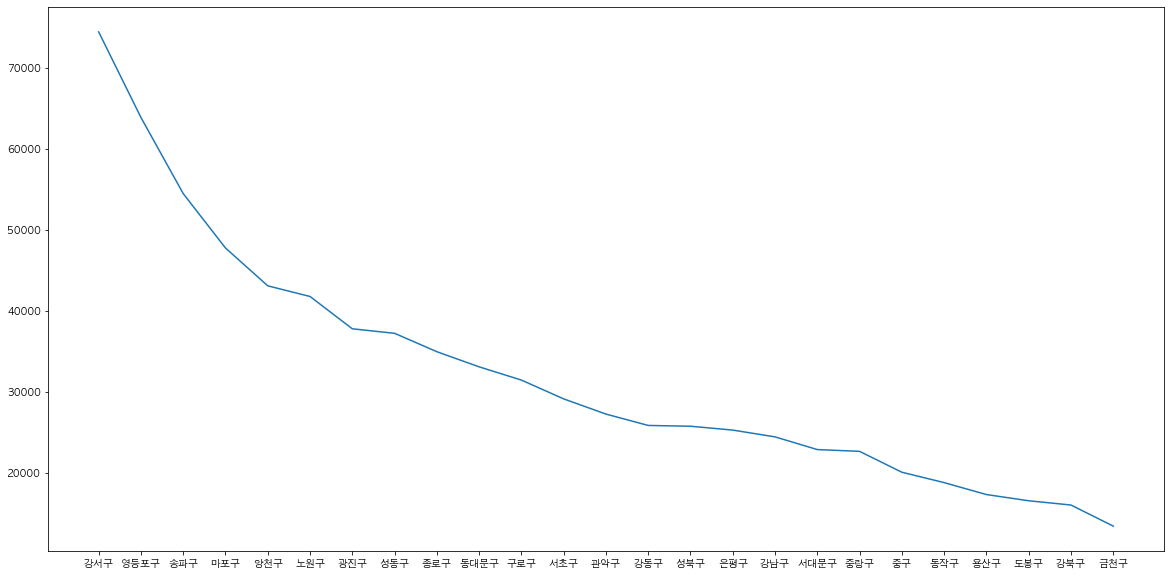

In [71]:
plt.figure(figsize=(20, 10))
plt.plot(total['소재지(위치)'],total['자전거번호'])
# plt.xticks(rotation=90)

In [ ]:
Q = T_station['소재지(위치)'].astype(str)

In [ ]:
T_station['소재지(위치)'] = Q

In [ ]:
for i in range(0,len(T_station['소재지(위치)'])):
    if type(T_station['소재지(위치)'][i]) ==str:
        T_station['소재지(위치)'][i] = None

In [ ]:
T_station

In [ ]:
msno.matrix(T_station)

In [ ]:
T_station[T_station['소재지']]

In [75]:
!ls -al ./data/ .csv

ls: .csv: No such file or directory
./data/:
total 2121968
drwxr-xr-x  16 riversong  staff        512  4 15 20:37 .
drwxr-xr-x  17 riversong  staff        544  4 15 21:34 ..
-rw-r--r--@  1 riversong  staff       6148  4 13 20:57 .DS_Store
-rw-r--r--@  1 riversong  staff     206960  4 15 20:37 location_2021.01.csv
-rw-r--r--   1 riversong  staff   16910214  4 13 20:57 sb1907.csv
-rw-r--r--   1 riversong  staff   16836863  4 13 20:57 sb1908.csv
-rw-r--r--   1 riversong  staff    9918328  4 13 20:56 sb2007.csv
-rw-r--r--   1 riversong  staff    6669254  4 13 20:56 sb2008.csv
-rw-r--r--@  1 riversong  staff  108814596  4 13 18:26 seoul_bike_201907_1.csv
-rw-r--r--@  1 riversong  staff  109739697  4 13 18:27 seoul_bike_201907_2.csv
-rw-r--r--@  1 riversong  staff   66250835  4 13 18:27 seoul_bike_201907_3.csv
-rw-r--r--@  1 riversong  staff  108864113  4 13 20:25 seoul_bike_201908_1.csv
-rw-r--r--@  1 riversong  staff  109803842  4 13 20:25 seoul_bike_201908_2.csv
-rw-r--r--@  1 riversong  

In [76]:
sb2078 = pd.read_csv('./data/seoul_bike_2020.07_08.csv',encoding='cp949')

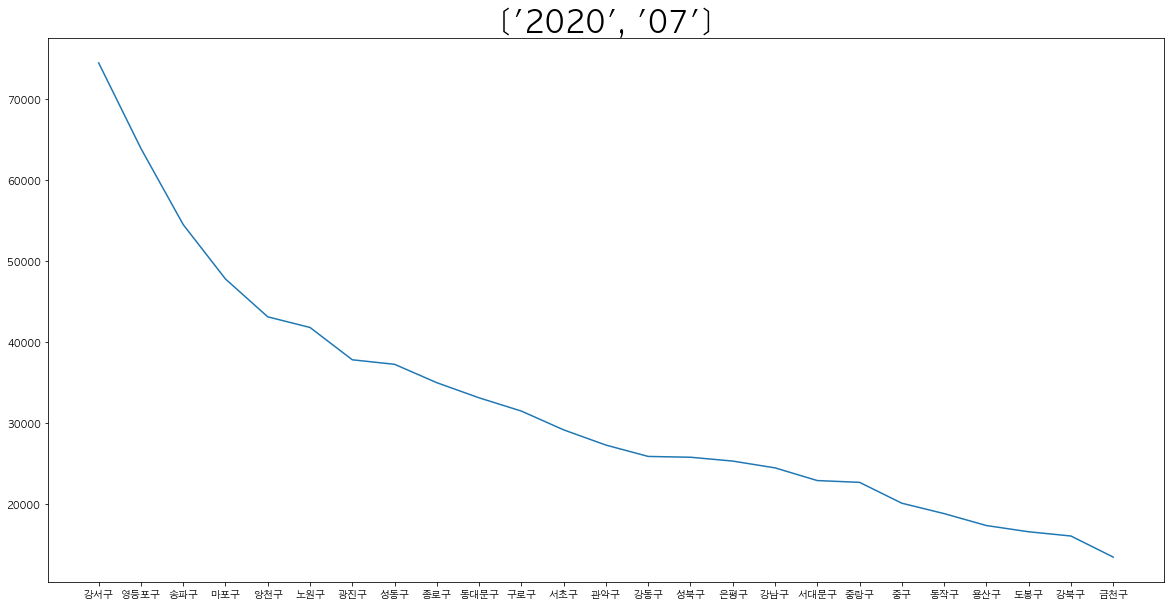

In [92]:
gu_filtering(sb2078,station)